In [70]:
import pandas as pd
import plotly_express as px

In [75]:
# Read the w3schools products data
df_products = pd.read_excel("Data/w3schools_Data.xlsx", "Orders", skiprows=0)

print(df_products.shape)
df_products.head()

(196, 5)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2
3,10251,84,3,1996-07-08,1
4,10252,76,4,1996-07-09,2


In [76]:
df_products_by_category = df_products.groupby('EmployeeID').count()

print(df_products_by_category.shape)
df_products_by_category.head()

(9, 4)


,OrderID,CustomerID,OrderDate,ShipperID
EmployeeID,,,,
1,29,29,29,29
2,20,20,20,20
3,31,31,31,31
4,40,40,40,40
5,11,11,11,11


In [77]:
df_products_by_category.reset_index(inplace=True)

print(df_products_by_category.shape)
df_products_by_category.head()

(9, 5)


,EmployeeID,OrderID,CustomerID,OrderDate,ShipperID
0,1,29,29,29,29
1,2,20,20,20,20
2,3,31,31,31,31
3,4,40,40,40,40
4,5,11,11,11,11


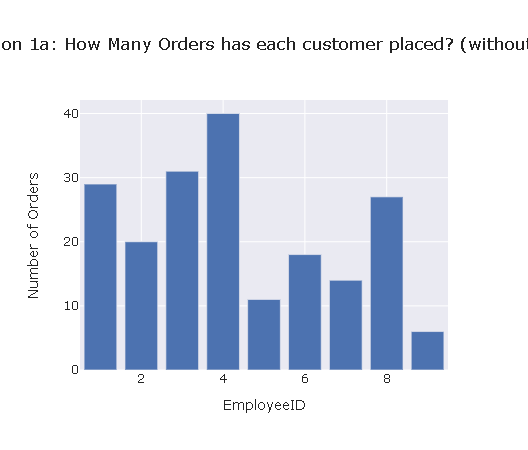

In [78]:
# plot
fig = px.bar(df_products_by_category, 
             x='EmployeeID', 
             y='ShipperID',
             template='seaborn',
             labels = {'ShipperID':'Number of Orders'},
             title='Question 1a: How Many Orders has each customer placed? (without Join)')
fig.show()


In [80]:
# The Categories table has the category names we need to improve our plot
df_categories = pd.read_excel("Data/w3schools_Data.xlsx", "Employees", skiprows=0)

print(df_categories.shape)
df_categories.head()

(10, 6)


,EmployeeID,LastName,FirstName,BirthDate,Photo,Notes
0,1,Davolio,Nancy,25180,EmpID1.pic,Education includes a BA in psychology from Col...
1,2,Fuller,Andrew,19043,EmpID2.pic,Andrew received his BTS commercial and a Ph.D....
2,3,Leverling,Janet,23253,EmpID3.pic,Janet has a BS degree in chemistry from Boston...
3,4,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...
4,5,Buchanan,Steven,20152,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...


In [82]:
# Create a new Dataframe that starts with the products table and adds the columns 
# we want from the categories table
df_prod_cat = pd.merge(df_products, df_categories, on='EmployeeID', how='left')

print(df_prod_cat.shape)
df_prod_cat.head()

(196, 10)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,LastName,FirstName,BirthDate,Photo,Notes
0,10248,90,5,1996-07-04,3,Buchanan,Steven,20152,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...
1,10249,81,6,1996-07-05,1,Suyama,Michael,23194,EmpID6.pic,Michael is a graduate of Sussex University (MA...
2,10250,34,4,1996-07-08,2,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...
3,10251,84,3,1996-07-08,1,Leverling,Janet,23253,EmpID3.pic,Janet has a BS degree in chemistry from Boston...
4,10252,76,4,1996-07-09,2,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...


In [83]:
print(df_prod_cat.shape)

(196, 10)


### GroupBy and Plot: *After* the Left Join

In [84]:
df_prod_cat_by_catname = df_prod_cat.groupby('LastName').count()

print(df_prod_cat_by_catname.shape)
df_prod_cat_by_catname.head()

(9, 9)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,FirstName,BirthDate,Photo,Notes
LastName,,,,,,,,,
Buchanan,11,11,11,11,11,11,11,11,11
Callahan,27,27,27,27,27,27,27,27,27
Davolio,29,29,29,29,29,29,29,29,29
Dodsworth,6,6,6,6,6,6,6,6,6
Fuller,20,20,20,20,20,20,20,20,20


In [85]:
# Get CategoryName out of index and into a regular column
df_prod_cat_by_catname.reset_index(inplace=True)

print(df_prod_cat_by_catname.shape)
df_prod_cat_by_catname.head()

(9, 10)


,LastName,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,FirstName,BirthDate,Photo,Notes
0,Buchanan,11,11,11,11,11,11,11,11,11
1,Callahan,27,27,27,27,27,27,27,27,27
2,Davolio,29,29,29,29,29,29,29,29,29
3,Dodsworth,6,6,6,6,6,6,6,6,6
4,Fuller,20,20,20,20,20,20,20,20,20


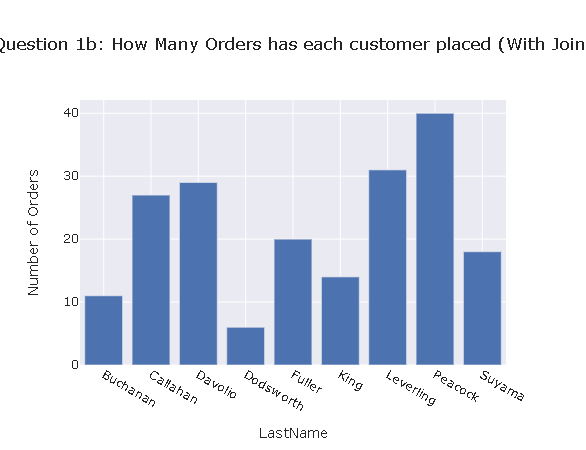

In [92]:
# Vertical Bar Chart:  Inventory value by Category
fig = px.bar(df_prod_cat_by_catname, 
             x='LastName', 
             y='ShipperID',
             #width=900,
             #height=400,
             template='seaborn',
             labels = {'ShipperID':'Number of Orders'},
             title='Question 1b: How Many Orders has each customer placed (With Join)')
fig.show()


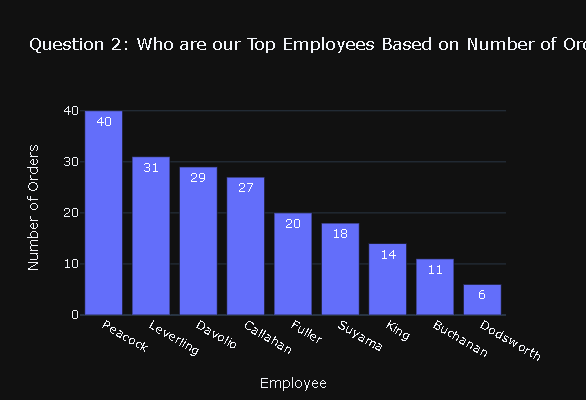

In [93]:
# Vertical Bar Chart:  Inventory value by Category
fig = px.bar(df_prod_cat_by_catname, 
             x='LastName', 
             y='ShipperID',
             width=900,
             height=400,
             template='plotly_dark',
             labels = {'ShipperID':'Number of Orders', 'LastName':'Employee'},
             text = 'ShipperID',
             title='Question 2: Who are our Top Employees Based on Number of Orders?')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()
